In [1]:
# Created By Mohsen Naghipourfar

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import mifs

In [6]:
data = pd.read_csv('../Data/fpkm_normalized.csv', header=None)
labels = pd.read_csv('../Data/disease.csv', header=None)
results = pd.read_csv('../New Results/Results/CSVs/result_200.csv', header=None)
gene_names = pd.read_csv('../Data/GDCData_GeneNames.csv', header=None)
diseases = labels[0].value_counts().index

In [7]:
random_feature_indices = np.random.choice(19671, 1000, replace=False)
all_feature_indices = [i for i in range(19671)]
x_train = data[all_feature_indices]
x_train.columns = gene_names.iloc[all_feature_indices, 0]
y_dummies = pd.get_dummies(labels[0])
del y_dummies[y_dummies.columns[-1]]
data_with_categories = pd.concat([x_train, y_dummies], axis=1)

In [8]:
n_samples = 1000
n_features = 200
n_classes = 34


y = labels[0].iloc[:n_samples,].astype('category').cat.codes
# y = y.iloc[:500,]
X = x_train.iloc[:n_samples,:]
y.max()

6

In [ ]:
def MIFS():
    # define MI_FS feature selection method
    feature_selector = mifs.MutualInformationFeatureSelector(method='JMI', k=int(y.max()), n_features=200, verbose=2)

    # find all relevant features
    feature_selector.fit(X, y)
    
    return feature_selector

In [ ]:
feature_selector = MIFS()
MI = feature_selector.mi_
with open('./MI.txt', 'a') as file:
    for i in range(len(feature_selector.mi_)):
      file.write("{0} : {1}\n".format(x_train.columns[feature_selector.ranking_[i]]), MI[i])

Are you sure y is categorical? It has more than 5 levels.
Selected feature #1 / 200 : 4174, JMI : 0.6221398451683582
Selected feature #2 / 200 : 16645, JMI : 1.2225925315097994
Selected feature #3 / 200 : 6561, JMI : 1.1960545217303329


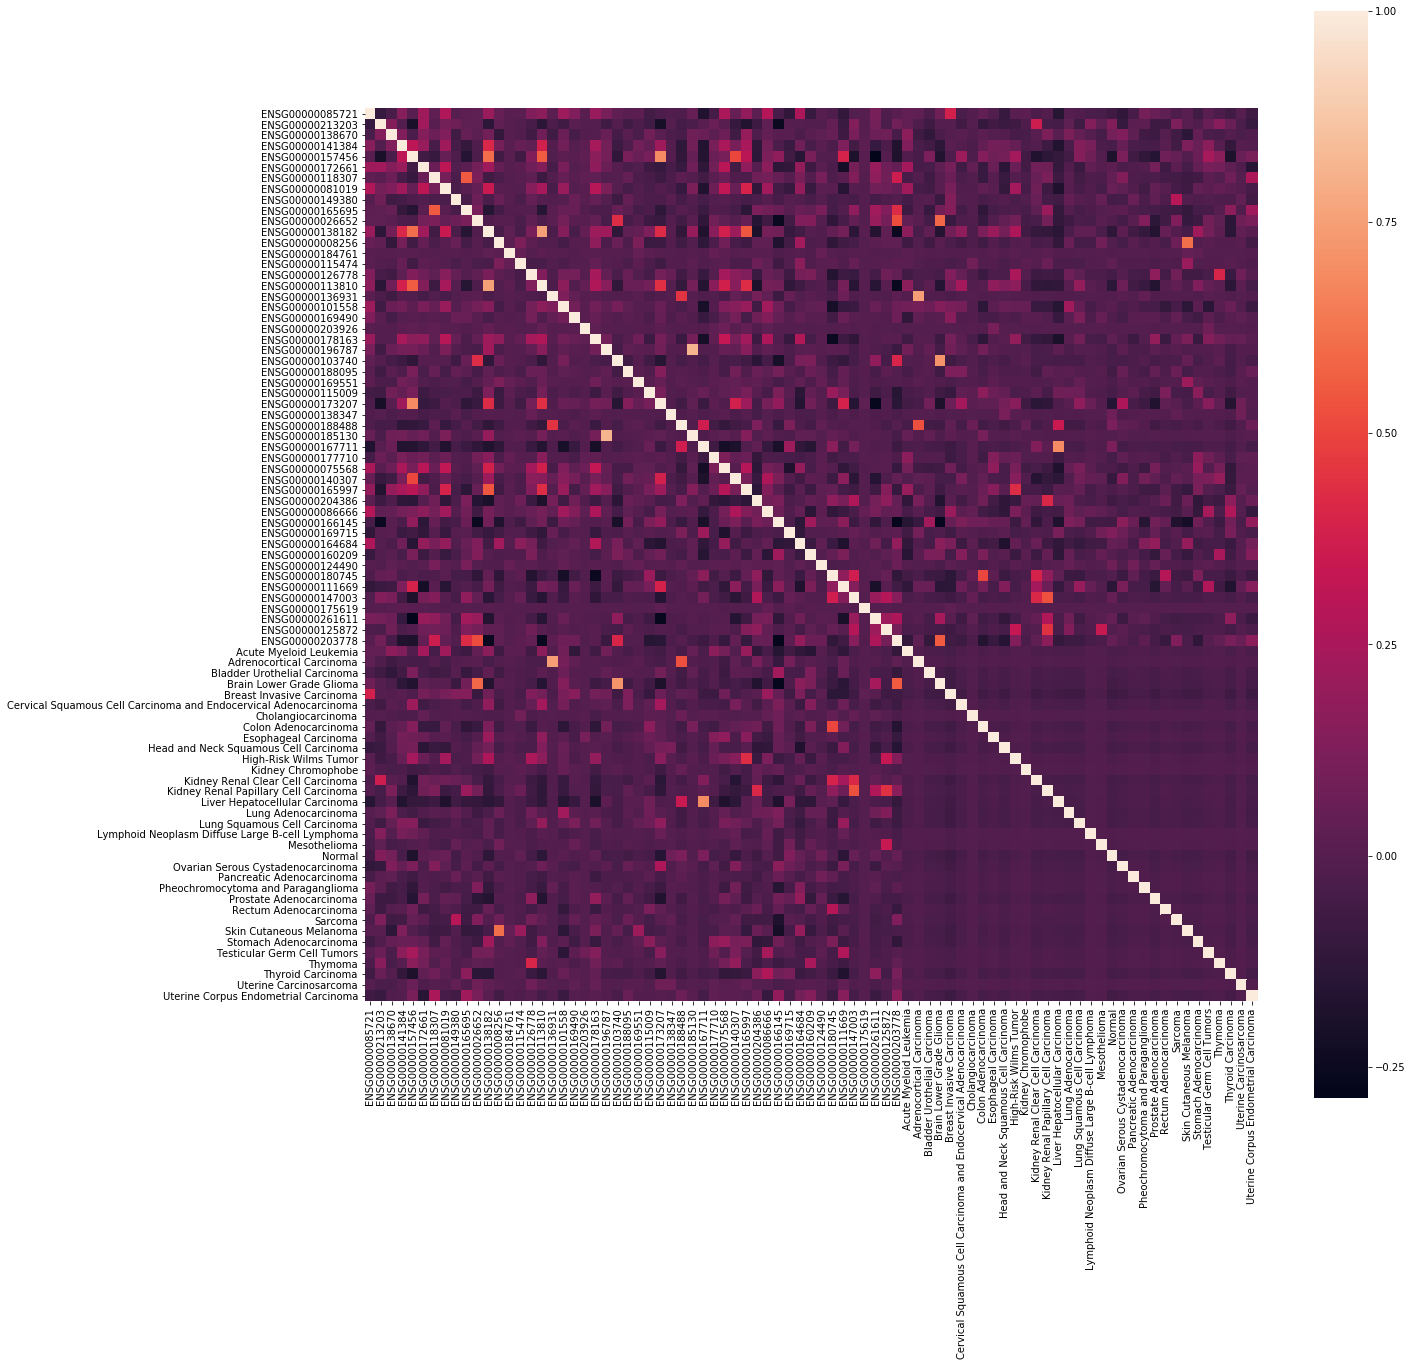

In [80]:
# Pearson Correlation (Which is not good for categorical Data! :)
corr_matrix = data_with_categories.corr()
# correlation_matrix = np.corrcoef(new_data.values)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.savefig('./RandomHeatmap.png')

In [91]:
for disease in diseases:
    try:
        k = 20 # Number of Variables for Heatmap
        cols = corr_matrix.nlargest(k, disease)[disease].index
        # cols = corr_matrix.nlargest(k, '').index
        cm = np.corrcoef(data_with_categories[cols].values.T)
        sns.set(font_scale=1.25)
        plt.subplots(figsize=(15,15))
        hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
                         yticklabels=cols.values, xticklabels=cols.values)
        plt.yticks(rotation=0)
        # plt.figure(figsize=(20, 20))
    #     plt.show()
        plt.savefig('./Heatmaps/{0}.png'.format(disease))
        plt.close()
    except:
        continue


In [109]:
mutual_matrix_y = mutual_info_classif(x_train, labels['disease'])
mutual_matrix_x = mutual_info_classif(x_train, )
mutual_matrix
# sns.set(font_scale=1.25)
# plt.subplots(figsize=(15,15))
# hm = sns.heatmap(mutual_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
#                  yticklabels=cols.values, xticklabels=cols.values)
# plt.yticks(rotation=0)
# plt.figure(figsize=(20, 20))
# plt.show()

array([0.19055231, 0.23174053, 0.17941152, 0.28834432, 0.55574635,
       0.16204438, 0.48814657, 0.25137546, 0.32348991, 0.38634124,
       0.40110817, 0.39527147, 0.33065918, 0.01473964, 0.26347025,
       0.47986629, 0.39568902, 0.17032692, 0.23488943, 0.17280727,
       0.01913284, 0.23469269, 0.17256487, 0.31872797, 0.20048341,
       0.11213269, 0.39057708, 0.4909832 , 0.10554334, 0.39225644,
       0.219673  , 0.46191581, 0.14918314, 0.17859936, 0.21725927,
       0.22513751, 0.36900665, 0.21814144, 0.62073093, 0.16636112,
       0.32760614, 0.24290663, 0.15155853, 0.51043343, 0.37224407,
       0.39848434, 0.00223329, 0.19274427, 0.41563214, 0.5303654 ])

In [6]:
# Boxplots: Feature-Label plot

# facet = sns.lmplot(data=data_to_plot, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

# for label in labels[0].value_counts().index:

#     for l, row in data_to_plot.loc[data_to_plot['label']==label,:].iterrows():
    
#         #add the data point as text
#         plt.annotate(row['label'], 
#                      (row['x'], row['y']),
#                      horizontalalignment='center',
#                      verticalalignment='center',
#                      size=11) 
# sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)
for i in range(x_train.shape[1]):
    data_to_plot = pd.concat([x_train[random_feature_indices[i]], labels], axis=1)
    data_to_plot.columns = ['feature', 'label']
    plt.xticks(rotation=90)
    sns.boxplot(x='label', y='feature', data=data_to_plot)
    plt.ylabel('feature {0}'.format(random_feature_indices[i]))
    plt.savefig('./Plots/box_{0}'.format(random_feature_indices[i]))
    plt.close()

In [108]:
labels.columns = ['disease']
x_train.columns = 
data_to_plot = pd.concat([x_train[0, 1], labels], axis=1)
# a.head(250)

KeyError: (0, 1)

In [107]:
for label in labels['disease'].value_counts().index:

    for l, row in data_to_plot.loc[data_to_plot['disease']==label,:].iterrows():
    
        #add the data point as text
        plt.annotate(row['disease'], 
                     (row['x'], row['y']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=11) 
sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)

KeyError: 'x'